### Observación: 

    Este documento es un panorama general de la sismmología urbana, del uso de ObsPy, referencias del trabajo y conclusiones. No todo el código empleado se encuentra aquí. Se sugiere consultar el notebook "Clock_Weekend" para el comportamiento semanal por estación, y el borrador "NoClientInDirectory_DraftStationsReader.ipynb" para consultar 1) métodos alternativos a la no lectura del cliente desde una carpeta, y 2) espectrogramas de traza del tren. 
    
    Parte del código de reloj se puede consultar en el repositorio SeismoRMS de Thomas Lecocq, mas el tratamiento de los archivos mseed y los psd no es el mismo.
    No proporciono todos los archivos mseed (trazas) utilizados, otorgados por la institución Centro de Geociencias UNAM Jurquilla y mi asesor el Dr. Victor Hugo Márquez (marvh@geociencias.unam.mx), que se utilizan en este repositorio. Solo está disponible la estación R95F0 para visualización pública.
   

# Sismología urbana por infrasonido, caso Querétaro

#### Daria D. Gómez Orozco, Universidad de Guadalajara, Departamento de Física
#### daria.gomez5378@alumnos.udg.mx

### Introducción

<style>
  p {
    text-align: justify;
  }

</style>

La sismología urbana es un campo de estudio que se centra en el análisis de los fenómenos sísmicos en entornos urbanos. Estos entornos presentan desafíos particulares debido a la presencia de estructuras construidas, cambios en las propiedades del suelo y la interferencia del ruido ambiental. El uso de sensores de infrasonido se ha vuelto relevante para la detección y análisis de eventos sísmicos. 

El estado de Querétaro, situado en una región de actividad sísmica moderada, cuenta con una red de sensores de infrasonido distribuidos estratégicamente en áreas urbanas. Estos sensores registran las ondas acústicas generadas por eventos sísmicos, proporcionando información sobre la actividad sísmica local y regional. La manipulación de estos datos permite identificar y caracterizar eventos sísmicos de interés, así como estudiar las propiedades del campo acústico ambiental en áreas urbanas.

El presente trabajo tiene como objetivo principal utilizar la red de detectores de infrasonido en Querétaro para analizar y procesar los datos obtenidos, con el fin de identificar y estudiar eventos sísmicos relevantes en el área. Se busca comprender la respuesta sísmica urbana en Querétaro, considerando que existen factores como la influencia de las estructuras urbanas, la variación en las propiedades del suelo y el ruido ambiental. Además, será posible evaluar el nivel de ruido en la Zona Metropolitana de Querétaro.

Mediante el análisis y procesamiento de los datos de infrasonido, se espera obtener información detallada sobre la actividad en Querétaro. Asimismo, los resultados obtenidos por futuros trabajos podrían tener implicaciones en términos de la planificación urbana, la mitigación de riesgos sísmicos y la seguridad de las estructuras en áreas urbanas. En resumen, este estudio se centra en la aplicación de la sismología urbana y el uso de sensores de infrasonido en el contexto específico de Querétaro. 
    

### Marco teórico

#### Espectrograma: 
Se ha documentado ampliamente que la señal sísmica tiene diferentes fuentes y mecanismos de generación en distintas bandas de frecuencia. Una herramienta muy útil para ilustrar estas diferencias son los espectrogramas, que descomponen la aceleración sísmica para obtener la evolución de su densidad espectral de potencia en función del tiempo y la frecuencia. Esta representación se expresa en decibelios (dB) y se compara con un valor de referencia de 1 (m^2/s^4)/Hz. En las frecuencias altas, la señal sísmica está dominada por actividades humanas, como se observa en las variaciones diurnas/nocturnas con una mayor energía durante las horas de trabajo y menos energía durante la noche y los fines de semana. La energía en frecuencias inferiores a 0.05-0.1 Hz está dominada por variaciones diurnas/nocturnas que no están relacionadas con señales naturales. Por encima de 0.25 Hz, las variaciones de energía tienen un aspecto más irregular, probablemente debido a la interacción del viento local con edificios y estructuras cercanas a la estación (Jordi Díaz _et al_, 2017)

### Antecedentes

#### McComas et al "Quantifying low-frecuency acoustic fields in urban environments"

Se han realizado otros trabajos relacionados con la cuantificación de bajas frecuencias acústicas en ambientes urbanos. Uno de estos es el desarrollado por McComas et al (INSERTAR Cita) quienes hicieron uso de tres sensores estratégicos de tres distritos distintos, uno en Dallas, Texas, otro en San Diego, California y en Vicksburg Misisipi. El estudio se centró en analizar las partes total y coherente del campo acústico en estos entornos urbanos diferentes: una zona metropolitana, una interfaz rural-suburbana y una pequeña ciudad con un corredor de transporte transitado. El objetivo era comprender las similitudes y diferencias de los campos acústicos en estos entornos para mejorar futuras instalaciones de arreglos infrasónicos urbanos y proporcionar un marco para capturar las partes total y coherente del campo acústico en estudios futuros.

Se desarrollaron modelos estadísticos de ruido como medida del campo acústico ambiental total observado en un conjunto de sensores. En general, la clasificación de los modelos de ruido estadístico desarrollados en este estudio es consistente en los modelos de bajo, medio y alto ruido. La potencia general del campo acústico tiene una relación inversa con el número de detecciones coherentes observadas: a medida que la potencia del campo acústico total aumenta, el número de detecciones coherentes disminuye. Los conjuntos de sensores en San Diego y Vicksburg observan órdenes de magnitud y más detecciones que los conjuntos de Dallas. Se teoriza que este efecto se debe al ruido ambiental más alto que enmascara las llegadas, lo que limita el número de señales acústicas coherentes que se pueden identificar dentro del ruido incoherente. 

El tipo de entorno urbano tiene consecuencias en la temporalidad observada en todas las bandas de frecuencia. En la banda de frecuencia de 0.1-1 Hz, el campo acústico está principalmente dictado por las tendencias de la velocidad del viento. Esta relación entre el aumento de la velocidad del viento y el aumento de la potencia espectral entre 0.1-1 Hz se observó en estudios anteriores. Las dos bandas de frecuencia más altas muestran los impactos de las fuentes antropogénicas en los diferentes entornos urbanos, como las variaciones entre días laborales y fines de semana. Al analizar la porción coherente del campo acústico, se observa una relación en la cual el número de detecciones aumenta durante el día y disminuye durante la noche, lo que indica un origen antropogénico.

En la banda de frecuencia más baja (0.1-1 Hz), las variaciones están correlacionadas con los cambios en las tendencias de velocidad del viento a escala diurna y estacional. Para capturar la amplitud de los cambios asociados con estas variaciones, es importante medir durante el día (ruido alto) y la noche (ruido bajo) durante el verano (ruido bajo) y el invierno (ruido alto). También es importante tener en cuenta fuentes de ruido local transitorio, como la construcción, ya que pueden aumentar la amplitud de los modelos estadísticos y afectar los umbrales de detección para frecuencias superiores a 1 Hz.

#### Jordi Díaz , Mario Ruiz , Pilar S. Sánchez-Pastor & Paula Romero en "Urban Seismology: on the origin of earth vibration within a city"

(J. Díaz, M. Ruíz, P. S. Sánchez-Pastor y P. Romero, 2017) titulado Urban Seismology: on the origin of earth vibration within a city. Es un estudio realizado en Barcelona en el que se analizaron los registros sísmicos obtenidos por una estación de banda ancha instalada en un instituto científico. Aunque inicialmente se instaló con fines de divulgación científica, el análisis de los datos reveló resultados de interés.  Los hallazgos principales incluyen la confirmación de que los sismómetros urbanos pueden ser utilizados como herramientas de monitoreo efectivas para el tráfico vial y la actividad del metro dentro de la ciudad. Además, se descubrió que es posible detectar y distinguir las señales sísmicas generadas por diversas actividades culturales, como conciertos, fuegos artificiales y eventos deportivos, en base a sus características sísmicas. 

Algo a rescatar dentro de las conclusiones de este estudio es que los sismómetros de banda ancha también pueden utilizarse para monitorear el paso de trenes subterráneos. En frecuencias alrededor de 30 Hz, es posible aislar el ruido del metro de la señal generada por el tráfico, lo que permite identificar los pasajes de tren individuales. Además, la actividad del metro también puede detectarse claramente en frecuencias muy bajas (0.005-0.1 Hz), un rango que no se explora en los estudios de ingeniería.

#### Jordi Diaz, Mario Ruiz y José-Antonio Jara en "Seismic monitoring of urban activity in Barcelona during the COVID-19 lockdown"

El estudio se centró en analizar las variaciones del ruido sísmico registrado durante el confinamiento en comparación con las variaciones a largo plazo durante los períodos de vacaciones. Además, se observaron las diferencias en los sitios de registro ubicados cerca de áreas industriales, centros de transporte o zonas residenciales. Los resultados mostraron que la reducción de la actividad humana durante el confinamiento se tradujo en una disminución de las vibraciones sísmicas en el rango de frecuencias de 2 a 20 Hz, y esta disminución fue significativamente mayor que durante los períodos de vacaciones. Este efecto se observó en toda la ciudad, pero solo en aquellas estaciones que no estaban afectadas por fuentes de vibración muy cercanas, como sitios de construcción o industrias, se correlacionó claramente con el nivel de actividad indicado por otros indicadores.


In [55]:
%%html
<img src="barcelona.png" alt = "Barcelona">

Figura 1. Mapas diarios que representan los valores reales de potencia en el rango de frecuencias de 2 a 20 Hz durante las horas de trabajo. Cada imagen corresponde a un día lunes (a) Período previo al confinamiento. (b) Fase 1 del confinamiento. (c) Fase 2 del confinamiento. (d) Período de levantamiento de restricciones. La línea discontinua marca el límite de los materiales del Paleozoico en las colinas que rodean Barcelona. La línea sólida marca el límite entre las áreas cubiertas por materiales del Holoceno y del Pleistoceno.

Referencia:
Diaz, J., Ruiz, M., & Jara, J.-A. (2021). Seismic monitoring of urban activity in Barcelona during the COVID-19 lockdown. Geophysical Research Abstracts, 23, EGU21-5424.

#### Srikanth Jakkampudi, Junzhu Shen, Weichen Li, Ayush Dev, Tieyuan Zhu y Eileen R. Martin en "Footstep detection in urban seismic data with a convolutional neural network"

En este trabajo se observaron señales fuertes en una zona exclusiva para peatones en un campus cuando los datos se filtraron en el rango de frecuencia de 1 a 5 Hz. Estas señales parecen moverse mucho más lentamente que los vehículos, generalmente a velocidades entre 1 y 2 m/s. Esta área exclusiva para peatones se encuentra a lo largo de una acera donde se prohíben los scooters, bicicletas, etc. Los hallazgos indican que las señales provienen de personas caminando. Para confirmar que las señales se debían a los pasos de los peatones, se llevaron a cabo experimentos registrando el tiempo específico de los caminantes. Se observó que no había otro ruido antropogénico fuerte aparte de las personas caminando en ese momento. 

Para ello desarrolló una red neuronal convolucional (CNN) para detectar peatones y se mejoró la precisión de detección mediante el preprocesamiento de datos, la adición óptima de capas y experimentación con hiperparámetros. 

### Metodología experimental

Para el presente proyecto, se utilizan los _data sets_ propios de cinco estaciones (R8358 Juriquilla, RDBC3 Oficina, R95F0, RE7AC Centro, R6417 Centro 2) de Querétaro pertenecientes a la red AM, adscritos al programa del GeoCiencias de la Universidad Autónoma de México (UNAM)... (Fig. ...)

In [76]:
%%html
<img src="estaciones.png" alt="Estaciones" width="400" height="400">


Fig. 1. Estaciones de infrasonido en Querétaro a utilizar

Haciendo uso de la librería Obspy, se obtienen las señales reportadas por los sensores. 

### Código


In [26]:
from obspy.clients.fdsn import Client
from obspy import read, UTCDateTime, read_inventory
import matplotlib.pyplot as plt
import numpy as np

#### Estaciones de CGEO

In [43]:
data_CGEO = Client("http://132.248.185.85:8080")

In [3]:
data_CGEO.get_stations(network='AM', station='*', location='00', channel='HD*', level='response')

Inventory created at 2023-06-27T20:54:44.819751Z
	Sending institution: SeisComP (CGEO)
	Contains:
		Networks (1):
			AM
		Stations (8):
			AM.R6417 (Casa-Juan)
			AM.R7E22 (Casa-Adolfo)
			AM.R8358 (Casa)
			AM.R95F0 (Casa-Alex)
			AM.RD07C (Montegrande-Colima)
			AM.RDBC3 (Oficina)
			AM.RE7AC (Casa Liliana)
			AM.REDAC (FACIMAR)
		Channels (8):
			AM.R6417.00.HDF, AM.R7E22.00.HDF, AM.R8358.00.HDF, AM.R95F0.00.HDF
			AM.RD07C.00.HDF, AM.RDBC3.00.HDF, AM.RE7AC.00.HDF, 
			AM.REDAC.00.HDF

In [7]:
t_year = UTCDateTime(2022, 12, 1, 0 , 0, 0)  #Originalmente, se pensaba extraer el año entero ,
                                            #Sin embargo se optó por el mes de Diciembre en sus primeras operaciones

In [5]:
R8358 = data_CGEO.get_waveforms("AM", "R8358", "00", "HDF", t_year, t_year+30*24*60*60)

In [6]:
R8358.write("R8358_December_2022.msd", format="MSEED");

In [29]:
R8358_Casa = read("R8358_December_2022.msd") #Lectura desde del archivo, sin demandar al servidor

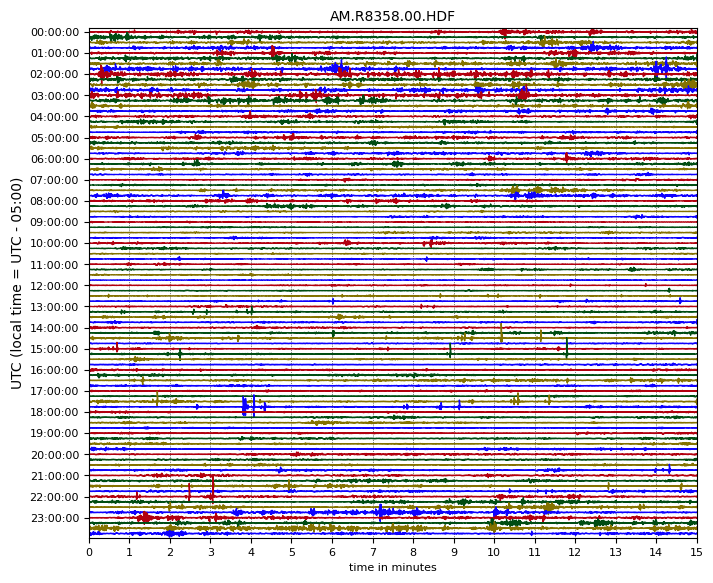

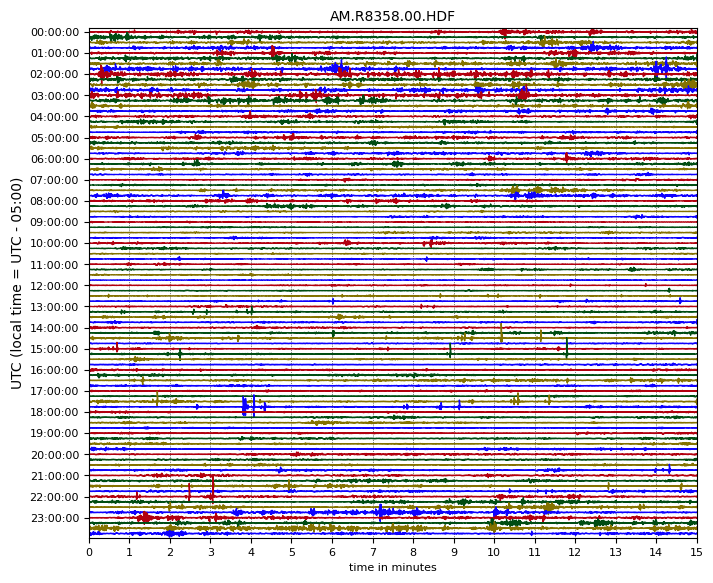

In [10]:
t1dic = UTCDateTime(2022, 12, 1, 0 , 0, 0)  #DÍA 01 DICIEMBRE 2022
DEC1_R8358 = R8358_Casa.copy()
DEC1_R8358.trim(t1dic, t1dic+24*60*60)
DEC1_R8358.detrend()  
DEC1_R8358.plot(type="dayplot")

#### Obteniendo archivo de respuesta

Sensibilidad: Indica cómo el instrumento convierte la amplitud de la señal física en una señal eléctrica. Específicamente, proporciona la relación entre la amplitud de la señal de entrada y la señal de salida registrada por el instrumento.

Coeficientes de respuesta: Representan la función de transferencia del instrumento. Estos coeficientes describen cómo la amplitud y la fase de la señal sísmica se ven afectadas a diferentes frecuencias. Pueden incluir coeficientes para filtrado, amplificación, atenuación u otras correcciones.

La función remove_sensitivity en ObsPy es utilizada para eliminar la sensibilidad del instrumento de los datos sísmicos registrados. La sensibilidad se refiere a la relación entre la amplitud de la señal física y la amplitud de la señal eléctrica registrada por el instrumento.

Cuando se registra una señal sísmica, el instrumento utilizado puede tener una sensibilidad particular que amplifica o atenúa la señal original. Esto significa que la amplitud de la señal registrada puede no corresponder directamente a la amplitud real de la señal sísmica.

In [ ]:
# Leer el archivo de respuesta del instrumento
inventory = read_inventory("respuesta.xml")

# Aplicar la corrección de sensibilidad
R8358_Casa.remove_sensitivity(inventory)

#Ahora se tiene en función de la aceleración

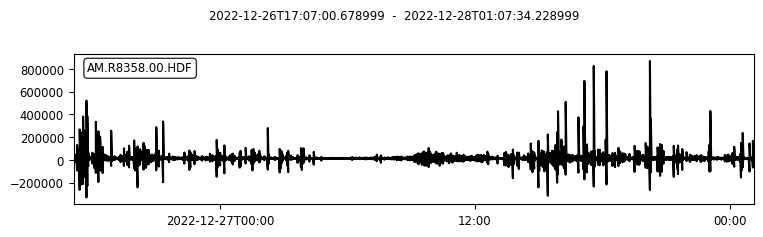

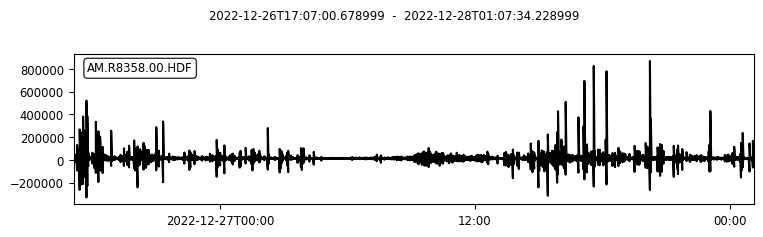

In [28]:
traza_8358 = R8358_Casa[4]
traza_8358.count() #De donde se desprenden 6 trazas
traza_8358.plot(freq_min=0.001) #De esta forma será posible utilizar solo las frecuencias de interés

In [63]:
start_time = UTCDateTime(2022, 12, 1, 0, 0, 0)  
end_time = UTCDateTime(2022, 12, 1, 23, 59, 0)  

stream_day = R8358_Casa.slice(start_time, end_time)

#### Espectrograma

En el contexto del procesamiento de señales, una ventana de tiempo se refiere a una porción de la señal que se analiza o procesa en un determinado intervalo de tiempo. La señal se divide en segmentos o ventanas de igual duración para realizar cálculos específicos, como el cálculo de un espectrograma, una transformada de Fourier o cualquier otro tipo de análisis.

La ventana de tiempo define el tamaño de cada segmento en el que se realizará el análisis. Cada ventana se superpone con la ventana anterior para obtener una cobertura continua de la señal. La elección del tamaño de la ventana es importante, ya que determina la resolución temporal y frecuencial del análisis.

La variable ventana_tiempo indica la duración de cada ventana utilizada para calcular el espectrograma. Un valor más grande de ventana_tiempo resultará en una mayor resolución frecuencial pero una menor resolución temporal, mientras que un valor más pequeño de ventana_tiempo tendrá el efecto opuesto.

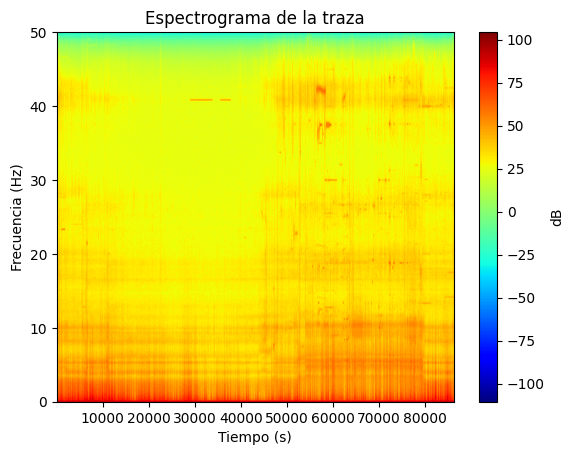

In [77]:
ventana_tiempo = 10  
sobreposicion = 0.5  

for i, traza in enumerate(stream_day):
    # Verificar si la traza contiene suficientes datos
    if len(traza.data) >= ventana_tiempo * traza.stats.sampling_rate:
         _, _, Sxx, _ = plt.specgram(traza.data, Fs=traza.stats.sampling_rate, NFFT=int(ventana_tiempo * traza.stats.sampling_rate),
                                    noverlap=int(ventana_tiempo * traza.stats.sampling_rate * sobreposicion),
                                    cmap='jet')
            
            #Fs=traza.stats.sampling_rate: la tasa de muestreo de la traza.
            #NFFT=int(ventana_tiempo * traza.stats.sampling_rate): el número de puntos utilizados en cada ventana.
            #noverlap=int(ventana_tiempo * traza.stats.sampling_rate * sobreposicion): el número de puntos de superposición entre ventanas.
        
    if Sxx is not None:
           
            plt.xlabel('Tiempo (s)')
            plt.ylabel('Frecuencia (Hz)')
            plt.colorbar(label='dB')
            plt.title(f'Espectrograma de la traza')
            plt.show()


#### Estudio particular de la movilidad con _Google dataset_


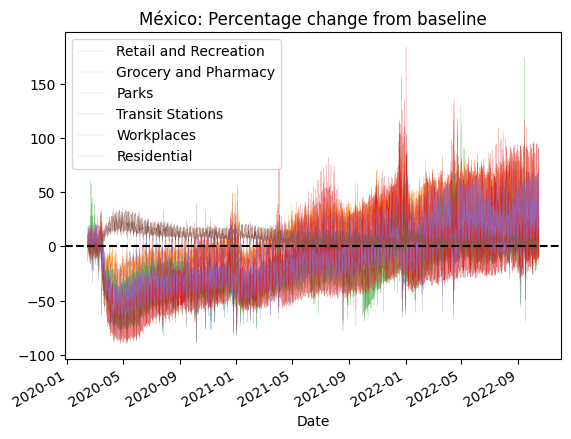

In [36]:
country = 'México'
mexico_data = filtered_data

mexico_data[['Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']].rolling(1).mean().plot(lw=0.1)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(loc='best')
plt.title(country + ': Percentage change from baseline')
plt.show()


# Comportamiento del ruido infrasónico en Querétaro



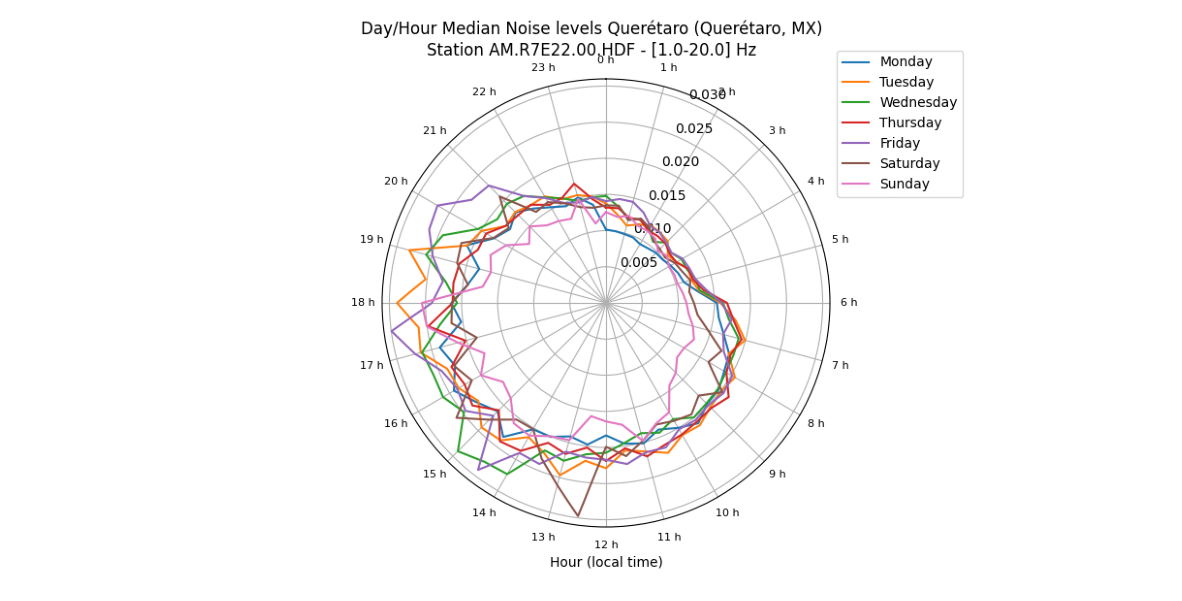

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = "Infra_Imagenes/R7E22_Clock_Infra.png"

plt.figure(figsize=(15, 12)) 
imagen = mpimg.imread(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  
plt.show()

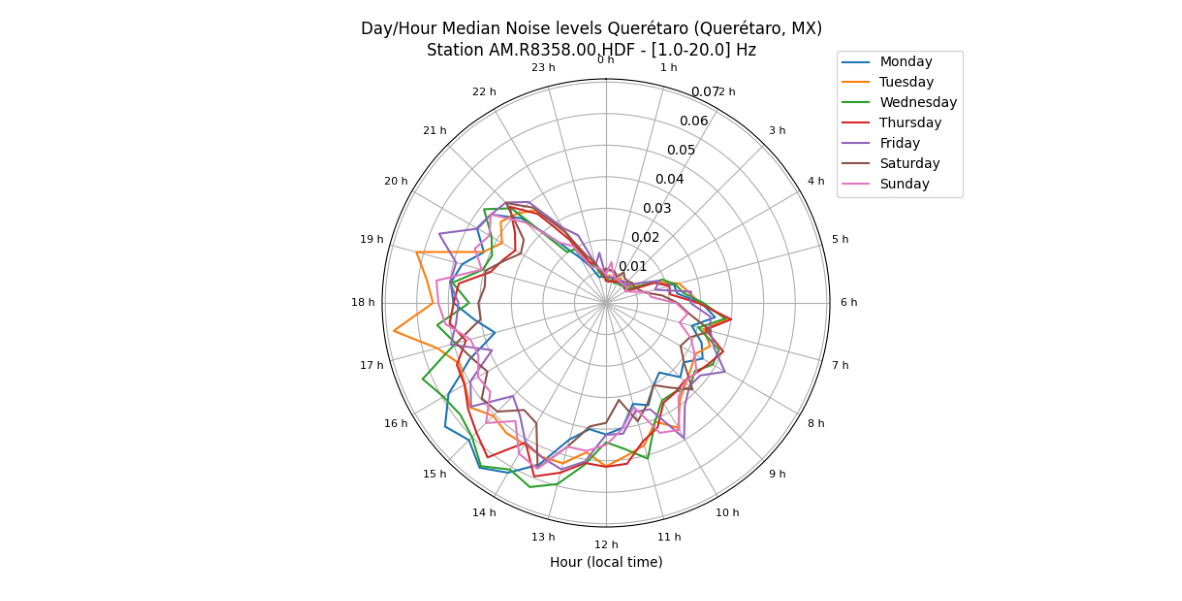

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = "Infra_Imagenes/R8358_Clock_Infra.png"

plt.figure(figsize=(15, 12)) 
imagen = mpimg.imread(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  
plt.show()


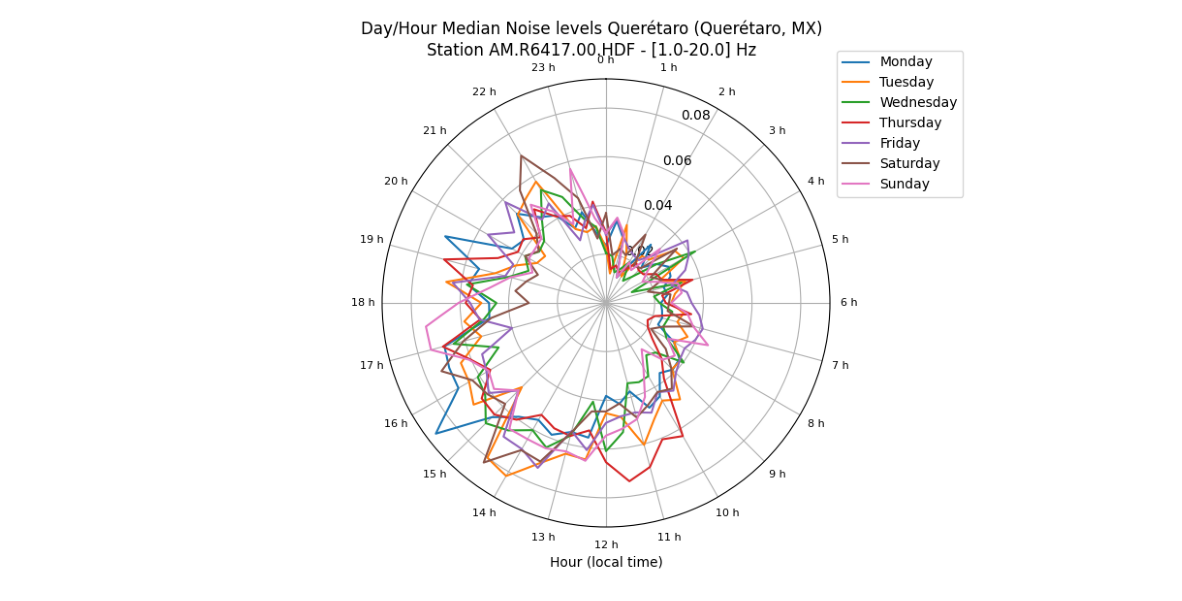

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = "Infra_Imagenes/R6417_Clock_Infra.png"

plt.figure(figsize=(15, 12)) 
imagen = mpimg.imread(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  
plt.show()


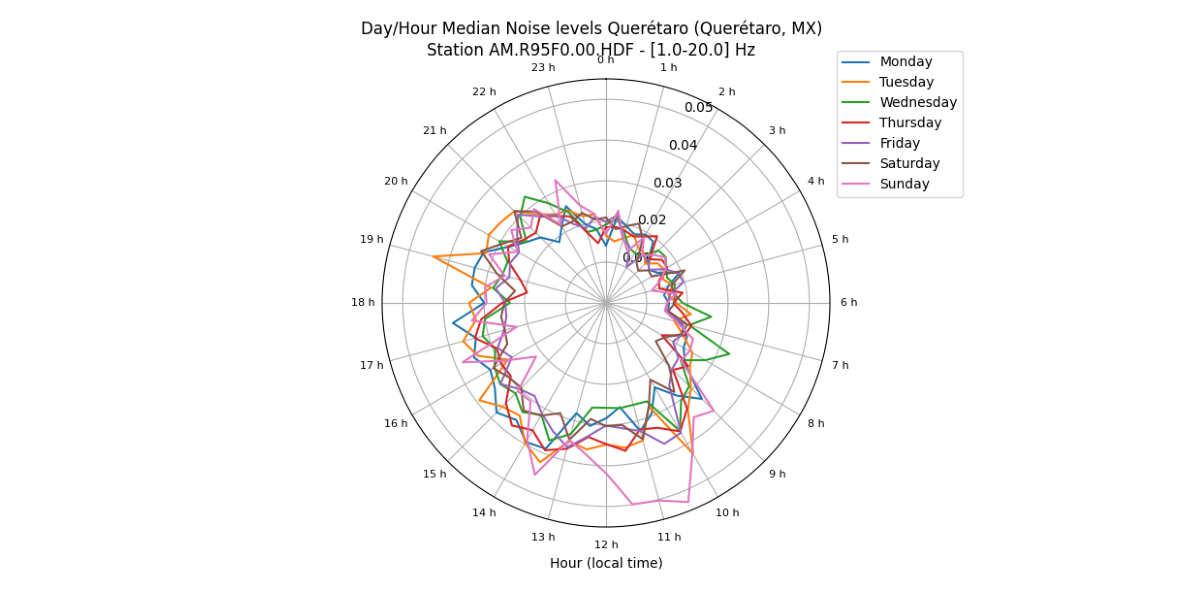

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = "Infra_Imagenes/R95F0_Clock_Infra.png"

plt.figure(figsize=(15, 12)) 
imagen = mpimg.imread(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  
plt.show()

# Observaciones

En nuestro estudio del ambiente infrasónico en Querétaro, empleamos herramientas proporcionadas por la biblioteca ObsPy para desentrañar el comportamiento subyacente de este fenómeno. Al examinar los espectrogramas generados a partir de trazas de tren, pudimos detectar patrones de frecuencias bajas que se desarrollan a lo largo del tiempo. Resultó particularmente fascinante cómo la actividad infrasónica varió en función de los días de la semana. Durante los días laborables, se evidenció un aumento sutil pero constante en la intensidad de las señales infrasónicas, lo que sugiere una correlación con la actividad industrial y de transporte. Sin embargo, los fines de semana revelaron un patrón diferente: una disminución marcada en la actividad infrasónica, que podría estar vinculada a la disminución de la actividad económica y el tráfico vehicular.

Se encontró que ciertas estaciones experimentaron fluctuaciones notables en la amplitud y la frecuencia de las señales infrasónicas a lo largo de la semana. Esto plantea interesantes preguntas sobre la influencia de las ubicaciones geográficas específicas en la exposición al ruido infrasónico y cómo los patrones de tráfico y actividades humanas podrían interactuar con los efectos topográficos y la propagación del sonido en la región. Los hallazgos sugieren que el ambiente infrasónico en Querétaro es intrincado y responde a una interacción compleja de factores humanos y geofísicos.

En resumen, este estudio no solo se trata de evaluar escuetamente el comportamiento del ambiente infrasónico en Querétaro, sino que también nos inspira a explorar más profundamente las implicaciones de estas observaciones. Las relaciones que se han identificado entre la actividad humana, las características geográficas y el ambiente infrasónico presentan un punto de partida para investigaciones futuras.

# Referencias

References
De Plaen, R. S. M., Márquez-Ramírez, V. H., Pérez-Campos, X., Zuñiga, F. R., Rodríguez-Pérez, Q., Gómez González, J. M., & Capra, L. (2021). Seismic signature of the COVID-19 lockdown at the city scale: a case study with low-cost seismometers in the city of Querétaro, Mexico. Solid Earth, 12(3), 713–724. https://doi.org/10.5194/se-12-713-2021

Diaz, J. (2021). Church bells and ground motions. Journal of Seismology, 25(1), 273–282. https://doi.org/10.1007/s10950-020-09935-2

Diaz, J., Ruiz, M., & Jara, J.-A. (2021). Seismic monitoring of urban activity in Barcelona during the COVID-19 lockdown. Solid Earth, 12(3), 725–739. https://doi.org/10.5194/se-12-725-2021

Díaz, J., Ruiz, M., Sánchez-Pastor, P. S., & Romero, P. (2017). Urban Seismology: on the origin of earth vibrations within a city. Scientific Reports, 7(1). https://doi.org/10.1038/s41598-017-15499-y

Global quieting of high-frequency seismic noise due to COVID-19 pandemic lockdown measures Thomas Lecocq1. (n.d.).

Jakkampudi, S., Shen, J., Li, W., Dev, A., Zhu, T., & Martin, E. R. (2020). Footstep detection in urban seismic data with a convolutional neural network. Leading Edge, 39(9), 654–660. https://doi.org/10.1190/tle39090654.1

McComas, S., Arrowsmith, S., Hayward, C., Stump, B., & McKenna Taylor, M. H. (2022). Quantifying low-frequency acoustic fields in urban environments. Geophysical Journal International, 229(2), 1152–1174. https://doi.org/10.1093/gji/ggab525

Natural and Anthropogenic Sources of Seismic, Hydroacoustic, and Infrasonic Waves: Waveforms and Spectral Characteristics (and Their Applicability for Sensor Calibration) Michaela Schwardt1 • Christoph Pilger1 • Peter Gaebler1 • Patrick Hupe1 • Lars Ceranna1. (n.d.).

Seismometers Within Cities: A Tool to Connect Earth Sciences and Society Jordi Diaz. (n.d.).

Temporal Variation in Cultural Seismic Noise and Noise Correlation Functions during COVID-19 Lockdown in Canada Ayodeji Paul Kuponiyi*1,2 and Honn. (n.d.). 1.